# Chapter 3: Linear Regression for a housing dataset

### Importing the necessary packages

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random
import utils
import gc
import time

### Defining and plotting our dataset

In [2]:
a = [10,3,-0.5]
b = 50
rooms = np.random.randint(low=1, high=80,size=20)
area = np.random.randint(low=1440, high=3600,size=20)
school_distance = np.random.randint(low=100, high=1000,size=20)
x = np.array([rooms, area, school_distance])
x = np.transpose(x)

rooms = np.unique(rooms)
y = rooms.dot(a[0]) + b + np.random.randint(low = 1, high = 8, size = len(rooms))

#features = np.array([1,2,3,5,6,7])
#labels = np.array([155, 197, 244, 356,407,448])
features = rooms
labels = y

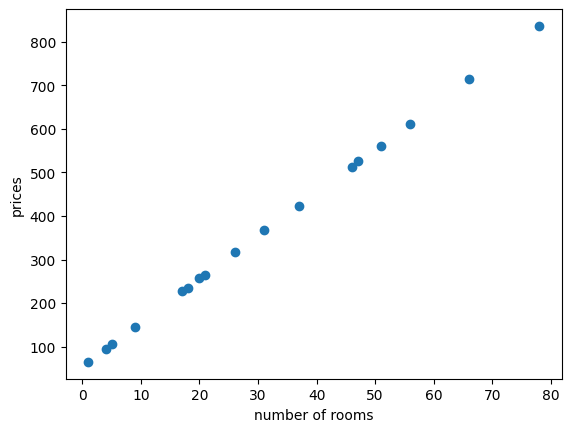

In [3]:
utils.plot_points(features, labels)

### Coding the tricks

- Simple trick
- Absolute trick
- Square trick

In [4]:
def simple_trick(base_price, price_per_room, num_rooms, price):
    small_random_1 = random.random()*0.1
    small_random_2 = random.random()*0.1
    predicted_price = base_price + price_per_room*num_rooms
    if(abs(predicted_price - price) < price * 5/100):
        return price_per_room, base_price
    if price > predicted_price and num_rooms > 0:
        price_per_room += small_random_1
        base_price += small_random_2
    if price > predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    if price < predicted_price and num_rooms > 0:
        price_per_room -= small_random_1
        base_price -= small_random_2
    if price < predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    return price_per_room, base_price

In [5]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price:
        price_per_room += learning_rate*num_rooms
        base_price += learning_rate
    else:
        price_per_room -= learning_rate*num_rooms
        base_price -= learning_rate
    return price_per_room, base_price

In [6]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    price_per_room += learning_rate*num_rooms*(price-predicted_price)
    base_price += learning_rate*(price-predicted_price)
    return price_per_room, base_price

### Running the linear regression algorithm

The linear regression algorithm consists of:
- Starting with random weights
- Iterating the square (or simple, or absolute) trick many times.

In [11]:
import random

# We set the random seed in order to always get the same results.
random.seed(0)

def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    
    for epoch in range(epochs):
        # Uncomment any of the following lines to plot different epochs
        #if epoch == 1:
        #if epoch <= 10:
        #if epoch <= 50:
        #if epoch > 50:

        #utils.draw_line(price_per_room, base_price, starting=0, ending=8)
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]

        #print(price_per_room, base_price, features[i])
        # Uncomment any of the 2 following lines to use a different trick
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate = 0.01)
    #utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    #utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    
    return price_per_room, base_price

# This line is for the x-axis to appear in the figure
#plt.ylim(0,150)

linear_regression(features, labels, learning_rate = 0.01, epochs = 100000)

0.7579544029403025 0.8444218515250481
5.929719714633125 264.604452747859
-3.763755592427568 225.83055151961622
-59.27206143160352 -1217.3854002989585
899.2412714159002 73546.65456180634
-47643.393152090444 -3130267.2173896125
1424063.9029525483 66039975.69952841
-19062565.532930784 -569045536.8128548
356698121.56888264 24231159811.906834
-10793202368.00395 -488664262708.4434
87047582199.93478 1468151428650.3313
-1058981007960.9631 -87922078603899.7
13898362164783.867 166352755332762.44
-37809975610016.664 -1436605715686054.0
206791095812715.0 2721612498500384.0
-40221940010445.25 498495176091942.0
-169428466394242.53 -2860874509886787.5
318614484950456.0 5435855662973088.0
-1369686915420702.5 -4.6901487748532824e+16
2865143851101459.5 -8788010849833368.0
3275892955082114.5 -6734265329930094.0
5734812197605432.0 8.424574664343266e+16
-4.992472870903616e+16 -3.589283953194913e+18
2.736100743655964e+17 -6.7747072552322e+17
5.825105073626217e+17 1.353194919233994e+19
-6.324608685804374e+18

C:\Users\iampk\AppData\Local\Temp\ipykernel_15712\1699003121.py:3: RuntimeWarning: overflow encountered in scalar multiply
  predicted_price = base_price + price_per_room*num_rooms
C:\Users\iampk\AppData\Local\Temp\ipykernel_15712\1699003121.py:4: RuntimeWarning: invalid value encountered in scalar add
  price_per_room += learning_rate*num_rooms*(price-predicted_price)
C:\Users\iampk\AppData\Local\Temp\ipykernel_15712\1699003121.py:5: RuntimeWarning: invalid value encountered in scalar add
  base_price += learning_rate*(price-predicted_price)


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


(nan, nan)

### Root mean squared error function

In [12]:
# The root mean square error function
def rmse(labels, predictions):
    n = len(labels)
    differences = np.subtract(labels, predictions)
    return np.sqrt(1.0/n * (np.dot(differences, differences)))

### Plotting the error function

0.8385177873733993 0.616666446325426
4.831966024359258 148.3742512148022
-23.734946390992796 -451.53090950759093
0.13894854829667835 -332.1614348111435
106.77760385426822 2973.636879673974
-1286.6295056310423 -62516.49726613562
-647.9482379133757 -61877.81599841796
40205.03980342161 2634419.3947296916
-645142.8832243324 -15184626.60399191
4068546.4628454032 130939743.12416987
2718464.2169752503 129589660.87829971
-98388647.55026828 -7756765056.966697
600704095.5122371 -1464930369.404149
667943574.0873221 -1128732976.5287237
1180481312.6696618 22448002998.258904
-2871964037.8036375 -50496013310.26049
7255958267.196498 152062432789.7422
-24749712198.681324 -520056646993.692
-3699949195.99683 -435857594982.95404
131452904744.34889 3753880877167.763
-1596646827795.1455 -75738706819648.98
34016511845723.098 1598079750835708.5
-461728376031800.0 -1.3770011773367508e+16
93689378663219.31 -1.154834075458743e+16
3095321081069322.0 6.649408350797124e+16
-2.7522910543408136e+16 -1.341944571217992

C:\Users\iampk\AppData\Local\Temp\ipykernel_15712\1699003121.py:3: RuntimeWarning: overflow encountered in scalar multiply
  predicted_price = base_price + price_per_room*num_rooms
C:\Users\iampk\AppData\Local\Temp\ipykernel_15712\1699003121.py:4: RuntimeWarning: invalid value encountered in scalar add
  price_per_room += learning_rate*num_rooms*(price-predicted_price)
C:\Users\iampk\AppData\Local\Temp\ipykernel_15712\1699003121.py:5: RuntimeWarning: invalid value encountered in scalar add
  base_price += learning_rate*(price-predicted_price)


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


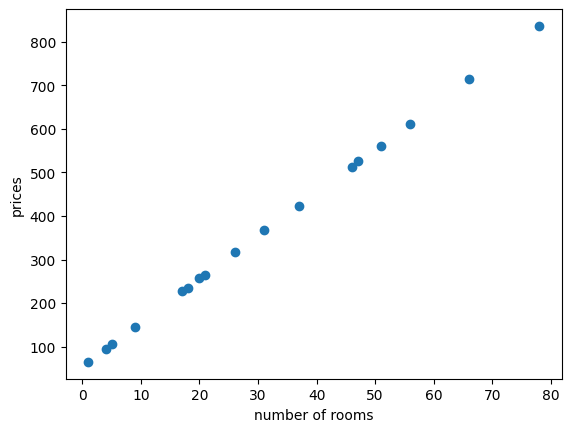

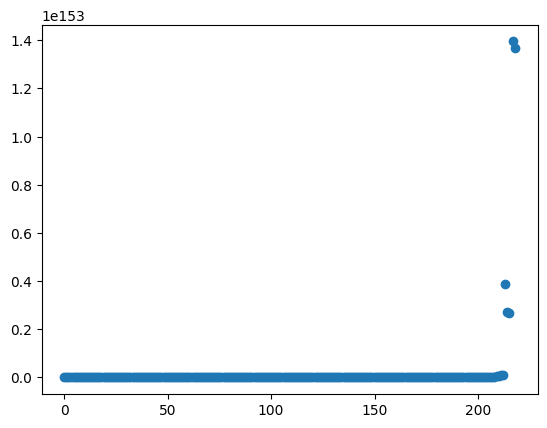

(nan, nan)

In [13]:
def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for i in range(epochs):
        predictions = features[0]*price_per_room+base_price
        errors.append(rmse(labels, predictions))
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment one of the following 3 lines to use the simple, the absolute, or the square trick
        #price_per_room, base_price = simple_trick(base_price,
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=9)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    return price_per_room, base_price

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

### Linear regression in Turi Create

In [ ]:
import turicreate as tc

datadict = {
    'features': features,
    'labels'  : labels,
}

data = tc.SFrame(datadict)

data

In [ ]:
model = tc.linear_regression.create(data, target='labels')

In [ ]:
model.coefficients

In [ ]:
new_point = tc.SFrame({'features': [4]})

model.predict(new_point)